# DL(w9) AE
student ID: 7110018036\
name: Chieh-An, Chou

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl

2023-05-09 22:32:38.663611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()

x_train_set = x_train_set/255.0
x_test = x_test/255.0

In [3]:
# (check data)
x_train_set.shape, y_train_set.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

0


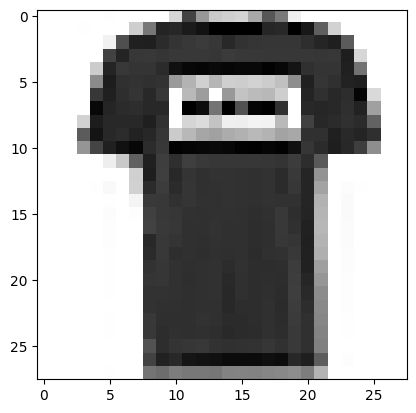

In [4]:
i = 1
print(y_train_set[i])
plt.imshow(x_train_set[i], cmap='binary')
plt.show()

In [5]:
# Split data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_set, y_train_set, random_state = 1)

## Stack Autoencoder
### 1. Build Model

In [6]:
np.random.seed(1)
tf.random.set_seed(1)

In [7]:
sk_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
])
sk_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]), 
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28])
])
sk_ae = keras.models.Sequential([sk_encoder, sk_decoder])

2023-05-09 22:32:40.908227: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-09 22:32:40.937205: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-09 22:32:40.937313: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-09 22:32:40.937742: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [8]:
sk_encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
sk_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               3100      
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 82,284
Trainable params: 82,284
Non-trainable params: 0
_________________________________________________________________


In [10]:
sk_ae.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                81530     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


### 2. Compile

In [11]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred)) # 0~1 -> 0,1
sk_ae.compile( loss='binary_crossentropy',   # pixel-by-pixel conpare original and reconstructed images
               optimizer=keras.optimizers.SGD(learning_rate=1.5),
               metrics=[rounded_accuracy])

### 3. Train 

In [12]:
train = sk_ae.fit(x_train, x_train, epochs=20, validation_data=(x_valid, x_valid))

Epoch 1/20
   1/1407 [..............................] - ETA: 25:27 - loss: 0.7078 - rounded_accuracy: 0.5018

2023-05-09 22:32:43.826103: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-09 22:32:43.828646: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f38647e59d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-09 22:32:43.828657: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-05-09 22:32:43.860249: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 [==============================] - 6s 4ms/step - loss: 0.3417 - rounded_accuracy: 0.8840 - val_loss: 0.3141 - val_rounded_accuracy: 0.9038
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3079 - rounded_accuracy: 0.9135 - val_loss: 0.3036 - val_rounded_accuracy: 0.9186
Epoch 3/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3009 - rounded_accuracy: 0.9196 - val_loss: 0.2974 - val_rounded_accuracy: 0.9205
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2962 - rounded_accuracy: 0.9238 - val_loss: 0.2962 - val_rounded_accuracy: 0.9242
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2931 - rounded_accuracy: 0.9265 - val_loss: 0.3032 - val_rounded_accuracy: 0.9060
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2906 - rounded_accuracy: 0.9287 - val_loss: 0.2904 - val_rounded_accuracy: 0.9251
Epoch 7/20
1407/1407 [=============================

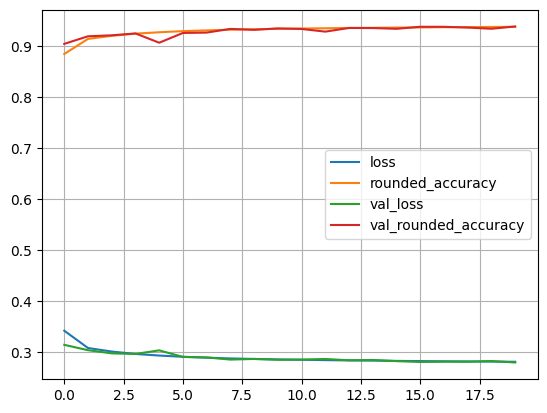

In [13]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

### 4. Evaluate

In [14]:
sk_ae.evaluate(x_test, x_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2827 - rounded_accuracy: 0.9365


[0.282710462808609, 0.9365233182907104]

### 5. Predict (Reconstruct)

In [15]:
x_test_decoded = sk_ae.predict(x_test)

313/313 [==============================] - 0s 822us/step


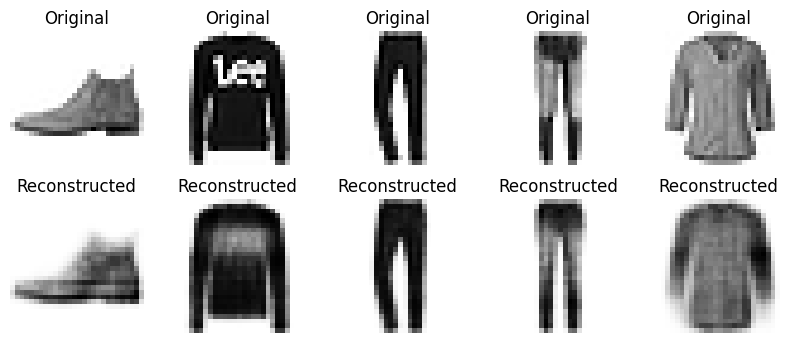

In [17]:
plt.figure(figsize=(10, 4))

for i in range(5):
    plt.subplot(2, 5, 1 + i)
    plt.imshow(x_test[i], cmap='binary')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, 5, 1+ 5 + i)
    plt.imshow(x_test_decoded[i], cmap='binary')
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()

### (Checking codings)

In [18]:
x_test_codings = sk_encoder.predict(x_test)
x_test_codings.shape

313/313 [==============================] - 0s 693us/step


(10000, 30)

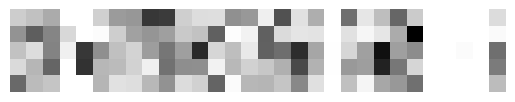

In [19]:
i=range(5)
plt.imshow(x_test_codings[i], cmap='binary')
plt.axis('off')
plt.show()

## Application: Data Visualization

In [20]:
from sklearn.manifold import TSNE

np.random.seed(1)

tsne = TSNE()
x_test_2D = tsne.fit_transform(x_test_codings)
x_test_2D = (x_test_2D - x_test_2D.min()) / (x_test_2D.max() - x_test_2D.min())

In [21]:
x_test_2D.shape

(10000, 2)

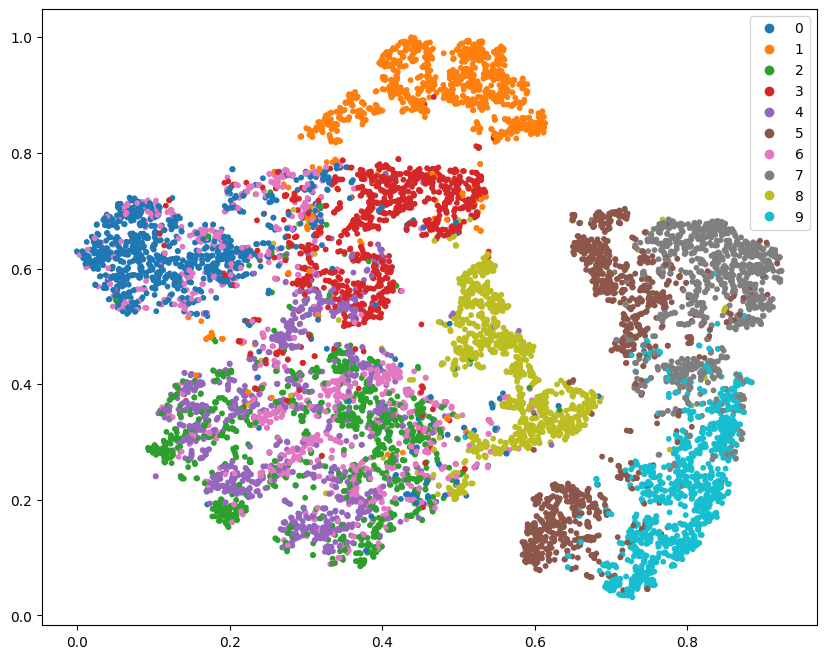

In [22]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_test_2D[:, 0], x_test_2D[:, 1], c=y_test, s=10, cmap=plt.cm.tab10)
plt.legend(*scatter.legend_elements())
plt.show()

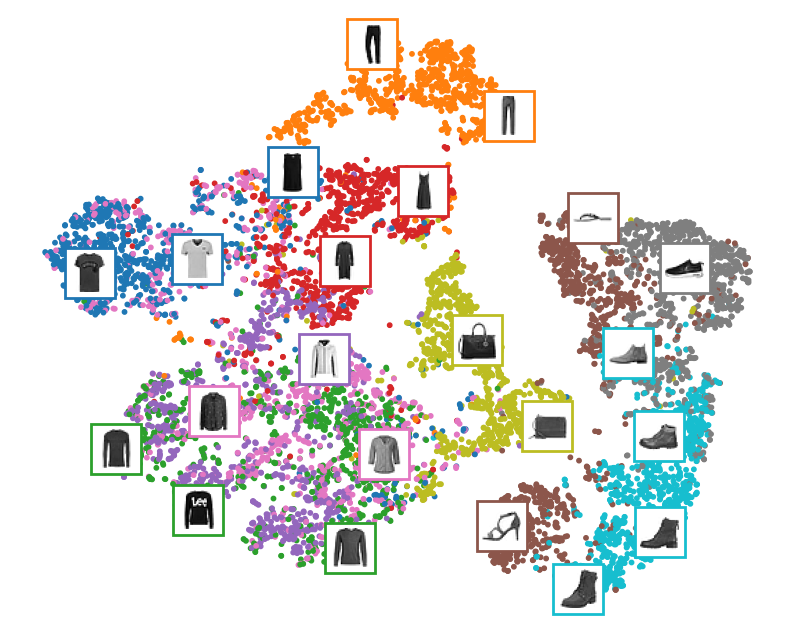

In [24]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
plt.scatter(x_test_2D[:, 0], x_test_2D[:, 1], c=y_test, s=10, cmap=plt.cm.tab10)
plt.axis('off')

image_positions = np.array([[1., 1.]])
for index, position in enumerate(x_test_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(x_test[index], cmap="binary"),
            position, bboxprops={"edgecolor": plt.cm.tab10(y_test[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

plt.show()